In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py

from matplotlib import animation
from matplotlib import cm
from mpl_toolkits import mplot3d
import os,sys

sys.path.append('/Users/ajc/Core/PreProcessing/PyScript')
import readdata as rd
import os
import seaborn as sns

import geopy.distance



In [2]:
sim = 'Crun1A'
path = '/Users/ajc/FUSE4/simulations/tests/ats-demos/13_reactive_transport/04_hyporheic_watershed/%s/'%sim
infile = [os.path.join(path,'visdump_surface_data.h5'), os.path.join(path,'visdump_surface_mesh.h5') ]

In [3]:
mesh = h5py.File(infile[1],'r')
mesh_data = list(mesh['0']['Mesh']['Nodes'])
vars = ['surface-total_component_concentration']
Suffix = ['DOM1', 'NO3-', 'N2(aq)','O2(aq)']
Suffix = ['NO3-']
Suffix = ['Tracer1']

In [4]:
Stream_C = dict()
for i, v in enumerate(vars):
    Stream_C[Suffix[i]] = rd.GetSurfVarFromVis_All(infile[0],vars[i],suffix='.cell.'+Suffix[i])[v]
cycles = len(Stream_C[Suffix[0]])
print (len(Stream_C[Suffix[0]]),Stream_C.keys())

161 dict_keys(['Tracer1'])


In [5]:
X_mesh = []
Y_mesh = []
Z_mesh = []

for m in mesh_data:#[:30]:
    X_mesh.append(m[0])
    Y_mesh.append(m[1])
    Z_mesh.append(m[2])
    

def subgrid_C(sg_file,sg_var, suff):
    sgC_data = rd.GetSurfVarFromVis_All(sg_file,sg_var,suffix='.cell.'+suff)
    sgConcentration = sgC_data[sg_var]
    return sgConcentration

260
-83.48060367992423 -83.39664444859618
35.02446722540252 35.08045573244733


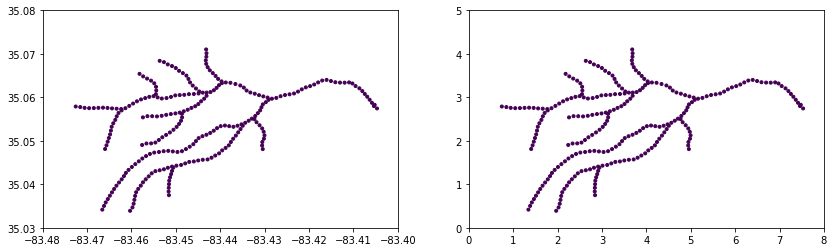

[0 1 2 3 4 5 6] 6.002079099775674


In [6]:
X_mesh = []
Y_mesh = []
Z_mesh = []

for m in mesh_data:#[:30]:
    X_mesh.append(m[0])
    Y_mesh.append(m[1])
    Z_mesh.append(m[2])
print (len(X_mesh))
def get_limits():
    fig = plt.figure(figsize=(14,4))
    ax = fig.add_subplot(121)

    ax.scatter(X_mesh,Y_mesh,marker=".",c=Z_mesh)
    #ax.set_xlim(xmin-0.0005,xmax)
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    print(xmin,xmax)
    print(ymin,ymax)
    X0 = [-83.48, -83.40]
    Y0 = [35.03, 35.08]
    ax.set_xlim(X0)
    ax.set_ylim(Y0)
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    xx = geopy.distance.geodesic(xmin,xmax).km + 0.07
    yy = geopy.distance.geodesic(ymin,ymax).km + 0.455
    Xlabels = np.round(np.linspace(0,xx,10,dtype=int),2)
    Ylabels = np.round(np.linspace(0,yy,7,dtype=int),2)

    ax = fig.add_subplot(122)
    ax.scatter(X_mesh,Y_mesh,marker=".",c=Z_mesh)
    ax.set_xticklabels(Xlabels)
    ax.set_yticklabels(Ylabels)
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    plt.show()
    print (Ylabels,yy)
    return X0, Y0, Xlabels, Ylabels
X0, Y0, Xlabels,Ylabels = get_limits()
#print (X0,Ylabels)

In [7]:
cell1 = np.array([30, 7, 11, 3,10,20, 30, 9,17,12, 11, 5,2,8, 13, 10,8,8, 11, 12,9,14])
cell2 = np.cumsum(cell1)
print (len(cell1))
print (cell2)
vis_columns = [0,15, 25] + [int((cell2[i] + cell2[i+1])/2.) for i in range(1,9) ] + [int((cell2[i] + cell2[i+1])/2.) for i in range(13,20) ]
print (vis_columns)



22
[ 30  37  48  51  61  81 111 120 137 149 160 165 167 175 188 198 206 214
 225 237 246 260]
[0, 15, 25, 42, 49, 56, 71, 96, 115, 128, 143, 181, 193, 202, 210, 219, 231, 241]


In [8]:
outfile='/Users/ajc/Core/PostProcessing/ReactiveTransport/Hyporheic/Coweeta/June11/%s/'%sim
#os.mkdir(outfile)

In [9]:
#%matplotlib qt

x_orig = X_mesh
y_orig = Y_mesh

centroid = []
thick = [1,1,1]
print ('Cycles: ',cycles)
count = 0
#cycles = 1
time = [np.round(t*360/3600,2) for t in range(cycles)]
var = Suffix[0]
for k in range(0,cycles,1):
    print ('Main', k)
    fig = plt.figure(figsize=(6,4))
    
    ax = fig.add_subplot(111,projection='3d')
    #ax.tick_params(axis='both', which='major', labelsize=12)
    #plt.tight_layout()
    
    ran = Stream_C[var][k]
    ran = [r*1e-3 if r>0 else 1e-12 for r in ran]
    
    sc = ax.scatter(X_mesh,Y_mesh,1,marker=".",c=ran,cmap=plt.get_cmap('jet'),vmin=1e-03,vmax=1,norm=matplotlib.colors.LogNorm())
    #ax.text(X_mesh[-1]-0.02,Y_mesh[-1]+0.025, 1, 'Time = %s [hr]'%time[k])
    cb = plt.colorbar(sc,pad=-0.04,fraction=0.046)#, label='Concentration [kg/m$^3$]',shrink=.96)#,aspect=10)
    cb.ax.set_ylabel('Concentration [kg/m$^3$]',labelpad=-90, y=1.1,rotation=0,fontsize=12)
    
    #axs[j].ticklabel_format(style='sci', axis='y', scilimits=(0,0),useMathText=True)
    
    #plt.colorbar(sc, label='',shrink=.5,orientation='vertical')#,aspect=4)
    
    ax.set_xlim(X0)
    ax.set_ylim(Y0)
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.set_xticklabels(Xlabels)
    ax.set_yticklabels(Ylabels)
    ax.set_xlabel('Distance [km]',fontsize=12,fontweight='normal')
    ax.set_ylabel('Distance [km]',fontsize=12,fontweight='normal')
    plt.xticks(fontsize=12,fontweight='normal')#, rotation=90)
    plt.yticks(fontsize=12,fontweight='normal')#, rotation=90)
    
    plt.tight_layout(h_pad=1)
    
    sub_c = []
    sub_x = []
    sub_y = []
    sub_top = []
    
    ax.view_init(45, -45) #this looks okay
    
    #for x1 in range(0,len(x_orig),20):
    for x1 in vis_columns:
        #print ('X1',x1)
        sg_infile = os.path.join(path,'visdump_subgrid_%s_data.h5'%x1)
        
        ran = subgrid_C(sg_infile,sg_var='subgrid_%s-total_component_concentration'%x1,suff=Suffix[0])[k][::-1]
        ran = [r*1e-3 if r>0 else 1e-12 for r in ran]
        Z_sgmesh = np.arange(0.05,1.05,0.05)#,dtype='int')
        Z_sgmesh = np.linspace(1,.4,20)
    
        sc1 = ax.scatter(X_mesh[x1],Y_mesh[x1],Z_sgmesh[::-1],marker=".",c=ran,cmap=plt.get_cmap('jet'),vmin=1e-03,vmax=1,norm=matplotlib.colors.LogNorm())
    
    ax.set_xlim(X0)
    ax.set_ylim(Y0)
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    
    xlabels = Xlabels[::-1]-1
    ax.set_xticklabels(xlabels)
    ax.set_yticklabels(Ylabels)
    #ax.set_xlabel('Distance [km]',fontweight='normal',fontsize=12)
    #ax.set_ylabel('Distance [km]')
    ax.set_zlim(0,1)
    ax.set_zticks([])
    ax.grid(False)
    plt.tight_layout()
    plt.savefig(outfile + '/%s/fig-%s.png'%(var,k),dpi=100)
    
    
    plt.close()
    count +=1
    
    if count >1000:
        print ('Count: ',count)
        break

Cycles:  161
Main 0
Main 1
Main 2
Main 3
Main 4
Main 5
Main 6
Main 7
Main 8
Main 9
Main 10
Main 11
Main 12
Main 13
Main 14
Main 15
Main 16
Main 17
Main 18
Main 19
Main 20
Main 21
Main 22
Main 23
Main 24
Main 25
Main 26
Main 27
Main 28
Main 29
Main 30
Main 31
Main 32
Main 33
Main 34
Main 35
Main 36
Main 37
Main 38
Main 39
Main 40
Main 41
Main 42
Main 43
Main 44
Main 45
Main 46
Main 47
Main 48
Main 49
Main 50
Main 51
Main 52
Main 53
Main 54
Main 55
Main 56
Main 57
Main 58
Main 59
Main 60
Main 61
Main 62
Main 63
Main 64
Main 65
Main 66
Main 67
Main 68
Main 69
Main 70
Main 71
Main 72
Main 73
Main 74
Main 75
Main 76
Main 77
Main 78
Main 79
Main 80
Main 81
Main 82
Main 83
Main 84
Main 85
Main 86
Main 87
Main 88
Main 89
Main 90
Main 91
Main 92
Main 93
Main 94
Main 95
Main 96
Main 97
Main 98
Main 99
Main 100
Main 101
Main 102
Main 103
Main 104
Main 105
Main 106
Main 107
Main 108
Main 109
Main 110
Main 111
Main 112
Main 113
Main 114
Main 115
Main 116
Main 117
Main 118
Main 119
Main 120
Main 121

In [ ]:
#Write solute concentration images to a directory
#%matplotlib qt

x_orig = X_mesh
y_orig = Y_mesh

centroid = []
thick = [1,1,1]
count = 0

for k in range(cycles):
    fig, ax = plt.subplots(1,1,figsize=(8,4))
    y1 = y_orig
    y2 = [i + 0.000001 for i in y1]
    X = [x_orig,x_orig]
    Y = [y1,y2]
    
    z = np.ones(len(x_orig))*0

    Z = np.array([z,z])
    data = np.linspace(1,0,len(x_orig))
    Z_data = np.array([data,data])
    
    data_color = cm.jet(Z_data/np.amax(Z_data))
    #ran = [f*1 for f in flux_interpolate] #Discharge_stream
    ran = Concentration[k]
    print ('------------------------')
    mx = np.max(ran)
    mx1 = np.where(ran == mx)
    
    ran = [r*1e-3*1e+6 if r>0 else 1e-12 for r in ran]
   
    sc = ax.scatter(X_mesh,Y_mesh,marker=".",c=ran,cmap=plt.get_cmap('rainbow'),vmin=1.0e-1,vmax=2.0,norm=matplotlib.colors.LogNorm())
    
    plt.colorbar(sc, label=r'%s Concentration [$\mu$ M]'%var,shrink=.96)

    xmin, xmax = ax.get_xlim()
    ax.set_xticks(np.round(np.linspace(xmin, xmax, 5), 2))
    ax.set_xticklabels(np.round(np.linspace(xmin, xmax, 5), 2), rotation=45, fontsize=10)
    
    xmin, xmax = ax.get_ylim()
    ax.set_yticks(np.round(np.linspace(xmin, xmax, 5), 2))
    ax.set_yticklabels(np.round(np.linspace(xmin, xmax, 5), 2), rotation=0, fontsize=10)
    ax.grid(False)
    plt.tight_layout(h_pad=1)
    #break
    print (outfile,var)
    plt.savefig(outfile + '/%s/fig-%s.png'%(var,k),dpi=100)
    count +=1
    if count >200:
        break
    plt.close()

In [ ]:
import re, os

def sorted_nicely( l ):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key = alphanum_key)

path_anim = os.path.join(outfile,var) + '/'
dir_files = os.listdir(path_anim)

Files = sorted_nicely(dir_files)
print (path_anim,outfile)
Files = [f for f in Files if f.endswith('.png')]
print (Files[:2])
import cv2
import numpy as np
#Files = Files[:60] + Files[450:520] #+ Files[37:70]
img_array = []
for filename in Files[::1]:
    #print (filename)
    filename = path_anim + filename
    #print (filename)
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
out = cv2.VideoWriter(path_anim + 'RT-coweeta.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 5, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()